In [3]:
pip install pulp

     |████████████████████████████████| 40.6MB 103kB/s 


In [4]:

import numpy as np
from scipy.optimize import minimize
import pulp as p
import matplotlib.pyplot as plt

Question 1:

objective function

z = 9x+12y

contraints:

x+y <= 50

30x+10y <= 1200

24x+48y <= 1920

In [ ]:
lp_problem1 = p.LpProblem('Problem',p.LpMaximize)

x = p.LpVariable("x", lowBound = 0)
y = p.LpVariable("y", lowBound = 0)
lp_problem1 += 9*x + 12*y

lp_problem1 += x+y <= 50
lp_problem1 += 30*x+10*y <= 1200
lp_problem1 += 24*x +48*y <= 1920

print(lp_problem1)
status = lp_problem1.solve()
print(p.LpStatus[status])
print(p.value(x),p.value(y),p.value(lp_problem1.objective))

Problem:
MAXIMIZE
9*x + 12*y + 0
SUBJECT TO
_C1: x + y <= 50

_C2: 30 x + 10 y <= 1200

_C3: 24 x + 48 y <= 1920

VARIABLES
x Continuous
y Continuous

Optimal
20.0 30.0 540.0


Text(0, 0.5, '$y$')

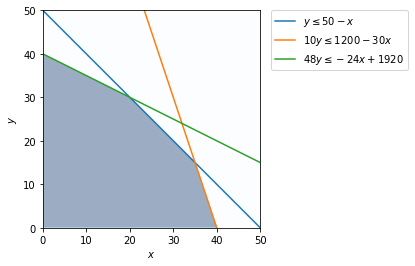

In [ ]:
d = np.linspace(-2,50,500)
x,y = np.meshgrid(d,d)
plt.imshow( ((y<=50-x) & (10*y <=1200-30*x) & (48*y <=1920-24*x)& (x>=0)&(y>=0)).astype(int),
           extent = (x.min(),x.max(),y.min(),y.max()), origin="higher",cmap="Blues", alpha=0.4);

x = np.linspace(0,50,100)
y1 = 50-x
y2 = (1200-30*x) / 10
y3 = (1920 - 24*x)/48
plt.plot(x,y1,label = r'$y\leq50-x$')
plt.plot(x,y2,label = r'$10y\leq1200-30x$')
plt.plot(x,y3,label = r'$48y\leq-24x+1920$')
plt.legend(bbox_to_anchor = (1.05,1),loc = 2,borderaxespad = 0.)

plt.xlim((0,50))
plt.ylim((0,50))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


Question 2:

objective function

Z = 1.5x + 2y

contraints:

10x+5y => 300

5x+10y => 240

6x+1y => 90

In [ ]:
lp_problem2 = p.LpProblem('Problem',p.LpMinimize)
x = p.LpVariable("x", lowBound = 0)
y = p.LpVariable("y", lowBound = 0)
lp_problem2 += 1.5*x + 2*y

lp_problem2 += 10*x+5*y >= 300
lp_problem2 += 5*x+10*y >= 240
lp_problem2 += 6*x +y >= 90

print(lp_problem2)
status = lp_problem2.solve()
print(p.LpStatus[status])
print(p.value(x),p.value(y),p.value(lp_problem2.objective))

Problem:
MINIMIZE
1.5*x + 2*y + 0.0
SUBJECT TO
_C1: 10 x + 5 y >= 300

_C2: 5 x + 10 y >= 240

_C3: 6 x + y >= 90

VARIABLES
x Continuous
y Continuous

Optimal
24.0 12.0 60.0


Text(0, 0.5, '$y$')

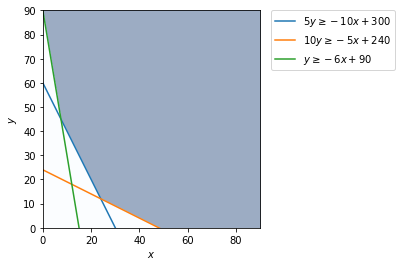

In [12]:
d = np.linspace(-2,100,500)
x,y = np.meshgrid(d,d)
plt.imshow( ((10*x+5*y>= 300)& (5*x+10*y>=240)&(6*x+y>=90)).astype(int),
           extent = (x.min(),x.max(),y.min(),y.max()),origin="lower",cmap="Blues",alpha=0.4)
x = np.linspace(-2,100,500)

y1 = (300-10*x)/5
y2 = (240-5*x) /10
y3 = 90 - 6*x

plt.plot(x,y1,label =r'$5y\geq-10x+300$')
plt.plot(x,y2,label=r'$10y\geq-5x+240$')
plt.plot(x,y3,label=r'$y\geq-6x+90$')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

plt.xlim((0,90))
plt.ylim((0,90))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')